# <h1><center>Approximation of a BM by Fourier expansion</center></h1>

As it is known (Kuo pp 21) we have

$$
B(t, \omega) = \frac{1}{\pi} \left( \frac{\xi_0\, t}{\sqrt{2}}+
   \sum_{n=1}^{\infty}\frac{\xi_n}{n}\,\sin\left( n\,t\right) 
    + \frac{\eta_n}{n}\left( 1 - \cos\left( n\,t\right) \right)
    \right)
$$

where $\left\{ \xi_0, \xi_1, \eta_1,  \xi_2, \eta_2, \cdots \right\}$ is an idependent set of normally distributed Gausssian variables

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

In [4]:
rng = default_rng(12345)

In [5]:
def bm_approx(order, size):
    one = np.ones(order)
    one_transpose = np.resize(one,(order,1))
    idd = one_transpose*np.ones(size)
    counter = np.arange(order) + 1
    counter_transpose = np.resize(one*counter,(order,1))
    tt = np.linspace(0, 2*np.pi, size)
    xi = rng.standard_normal(order) 
    eta = rng.standard_normal(order) 
    a = np.resize(xi*1/counter,(order,1))
    b = np.resize(eta*1/counter,(order,1))
    xi0 = rng.standard_normal()
    nbb = tt*xi0/np.sqrt(2) + np.sum( 
        a*np.sin(counter_transpose*tt)+ b*(idd - np.cos(counter_transpose*tt)),
        axis = 0) 
    return(tt, nbb/np.pi) 

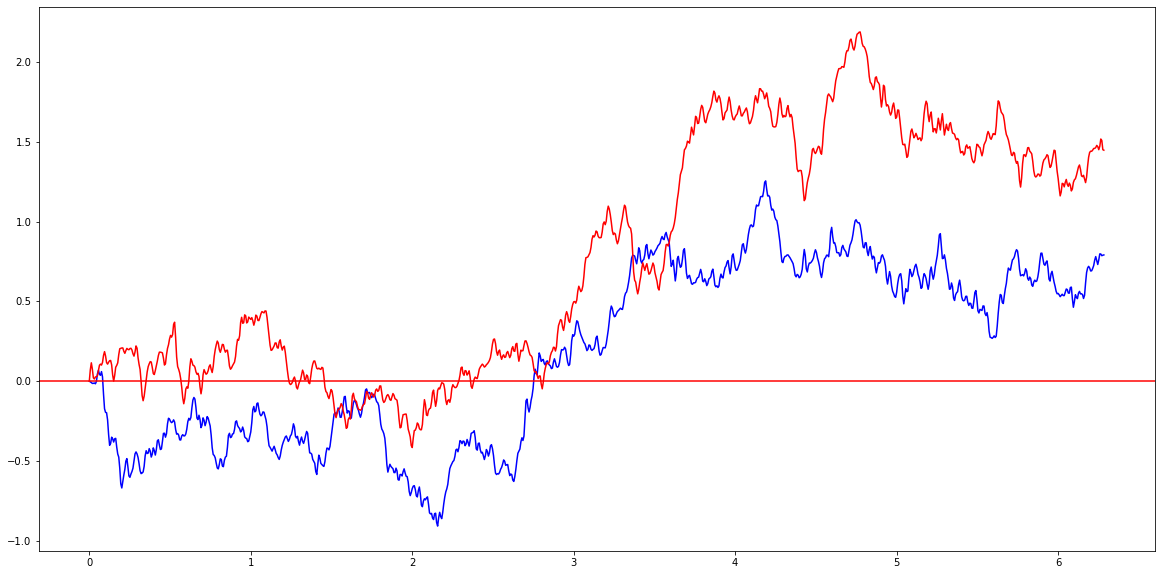

In [6]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
tt, B = bm_approx(300, 1000)
tt1, B1 = bm_approx(300, 1000)
ax.plot(tt, B, color = 'b')
ax.plot(tt1, B1, color = 'red')
ax.axhline(y=0, xmin=0, xmax=2*np.pi, color = 'r')
plt.show()